### Import the tools

In [118]:
# Import libraries for data analysis and creating Machine Learning models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

In [119]:
warnings.filterwarnings('ignore')

### Gathering Data

In [120]:
# Using Original Datasets
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',sep=';')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Data Cleaning

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [122]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [123]:
df.duplicated().any()

False

In [124]:
data1 = df.select_dtypes('object')
data1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [125]:
data2 = df.select_dtypes('int64')
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [126]:
# The data doesn't have any empty values or duplicated rows.
# However, I found 4 columns that I need to drop because they are not necessary for the analysis:
    
    # 1. Over18:            All values are 'Y' (Above 18 Years Old).
    # 2. EmployeeCount:     All values in this column are 1.
    # 3. EmployeeNumber:    All values indicate an ID and don't affect the analysis result.
    # 4. StandardHours:     All values in this column are 80.0.

In [127]:
df = df.drop(columns=[
    'Over18',
    'EmployeeCount',
    'EmployeeNumber',
    'StandardHours'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


### Exploratory Data Analysis (EDA)

In [128]:
# Creating a copy DataFrame
DF = df.copy()

In [129]:
# Creating Template Colour
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"B0D9B1"})
sns.set_palette('crest')

In [130]:
# Choosing Classification Columns
classic_kolom = ['Education',
         'EnvironmentSatisfaction',
         'JobInvolvement',
         'JobSatisfaction',
         'PerformanceRating',
         'RelationshipSatisfaction',
         'WorkLifeBalance']

In [131]:
# Classification Definition
interpreter_education = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

interpreter_satisfaction = {
    1 :'Low',
    2 :'Medium',
    3 :'High',
    4 :'Very High'
}

interpreter_performancerating = {
    1 :'Low',
    2 :'Good',
    3 :'Excellent',
    4 :'Outstanding'
}

interpreter_worklifebalance = {
    1 :'Bad',
    2 :'Good',
    3 :'Better',
    4 :'Best'
}

In [132]:
DF[classic_kolom[0]] = DF[classic_kolom[0]].replace(interpreter_education)

DF[classic_kolom[2]] = DF[classic_kolom[2]].replace(interpreter_satisfaction)

for satisfaction in classic_kolom[1::2]:
    DF[satisfaction] = DF[satisfaction].replace(interpreter_satisfaction)

DF[classic_kolom[4]] = DF[classic_kolom[4]].replace(interpreter_performancerating)

DF[classic_kolom[-1]] = DF[classic_kolom[-1]].replace(interpreter_worklifebalance)

# Selection "Object" Dataframe
object_columns = DF.select_dtypes(['object']).columns.drop('Attrition').to_list()
object_columns

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

Data Distribution for object Columns

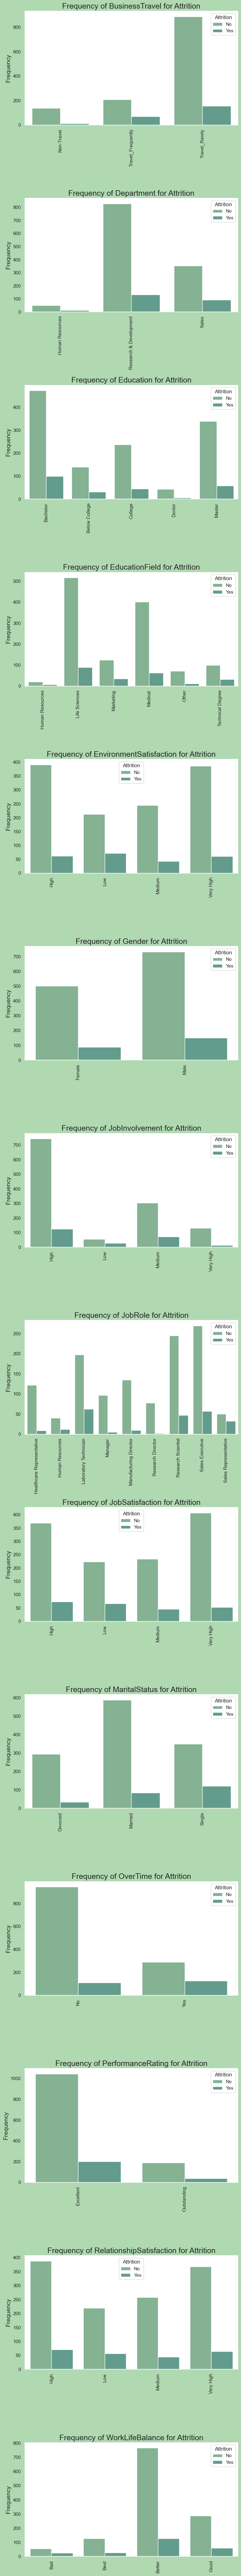

In [133]:
# Create subplots
fig, axes = plt.subplots(
    nrows=len(object_columns),
    ncols=1,
    figsize=(8, 6 * len(object_columns)))

for x, kolom_name in enumerate(object_columns):
    grouped = DF.groupby([kolom_name, 'Attrition']).size().reset_index(name='Count')

    sns.barplot(data=grouped, x=kolom_name, y='Count', hue='Attrition', ax=axes[x])
    axes[x].set_title(f'Frequency of {kolom_name} for Attrition', fontsize=18)
    axes[x].set_xlabel('')
    axes[x].set_ylabel('Frequency', fontsize=14)
    
    for tick in axes[x].get_xticklabels():
        tick.set_rotation(90)

# Visualize the Plot
plt.tight_layout()
plt.show()

Data Distribution for numeric Columns

In [134]:
numeric_columns = DF.select_dtypes(np.number).columns.to_list()
numeric_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

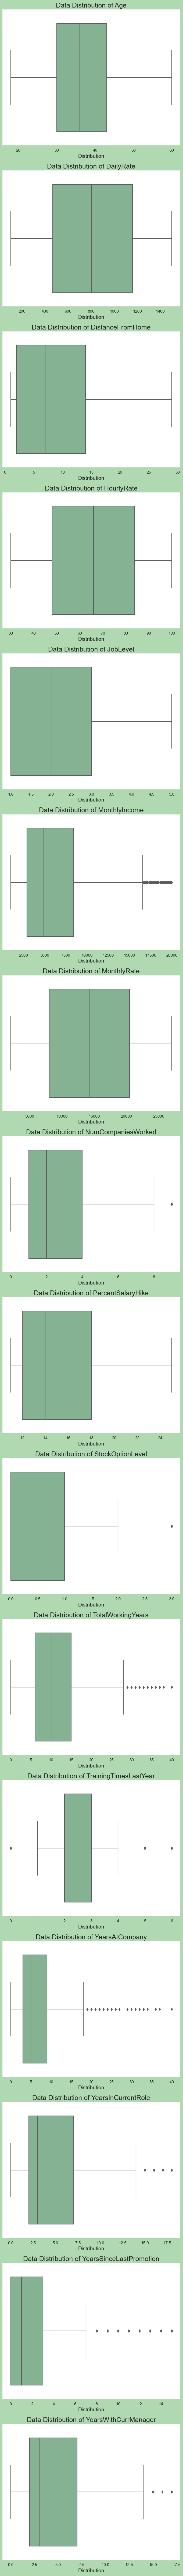

In [135]:
fig, ax = plt.subplots(len(numeric_columns), 1, figsize=(7, 6 * len(numeric_columns)))

for q, axx in enumerate(numeric_columns):
    sns.boxplot(data=DF, x=axx, ax=ax[q])
    
    ax[q].set_title(f'Data Distribution of {axx}', fontsize=18)
    ax[q].set_ylabel('')
    ax[q].set_xlabel('Distribution', fontsize=14)

plt.tight_layout()
plt.show()

Calculate the correlation matrix

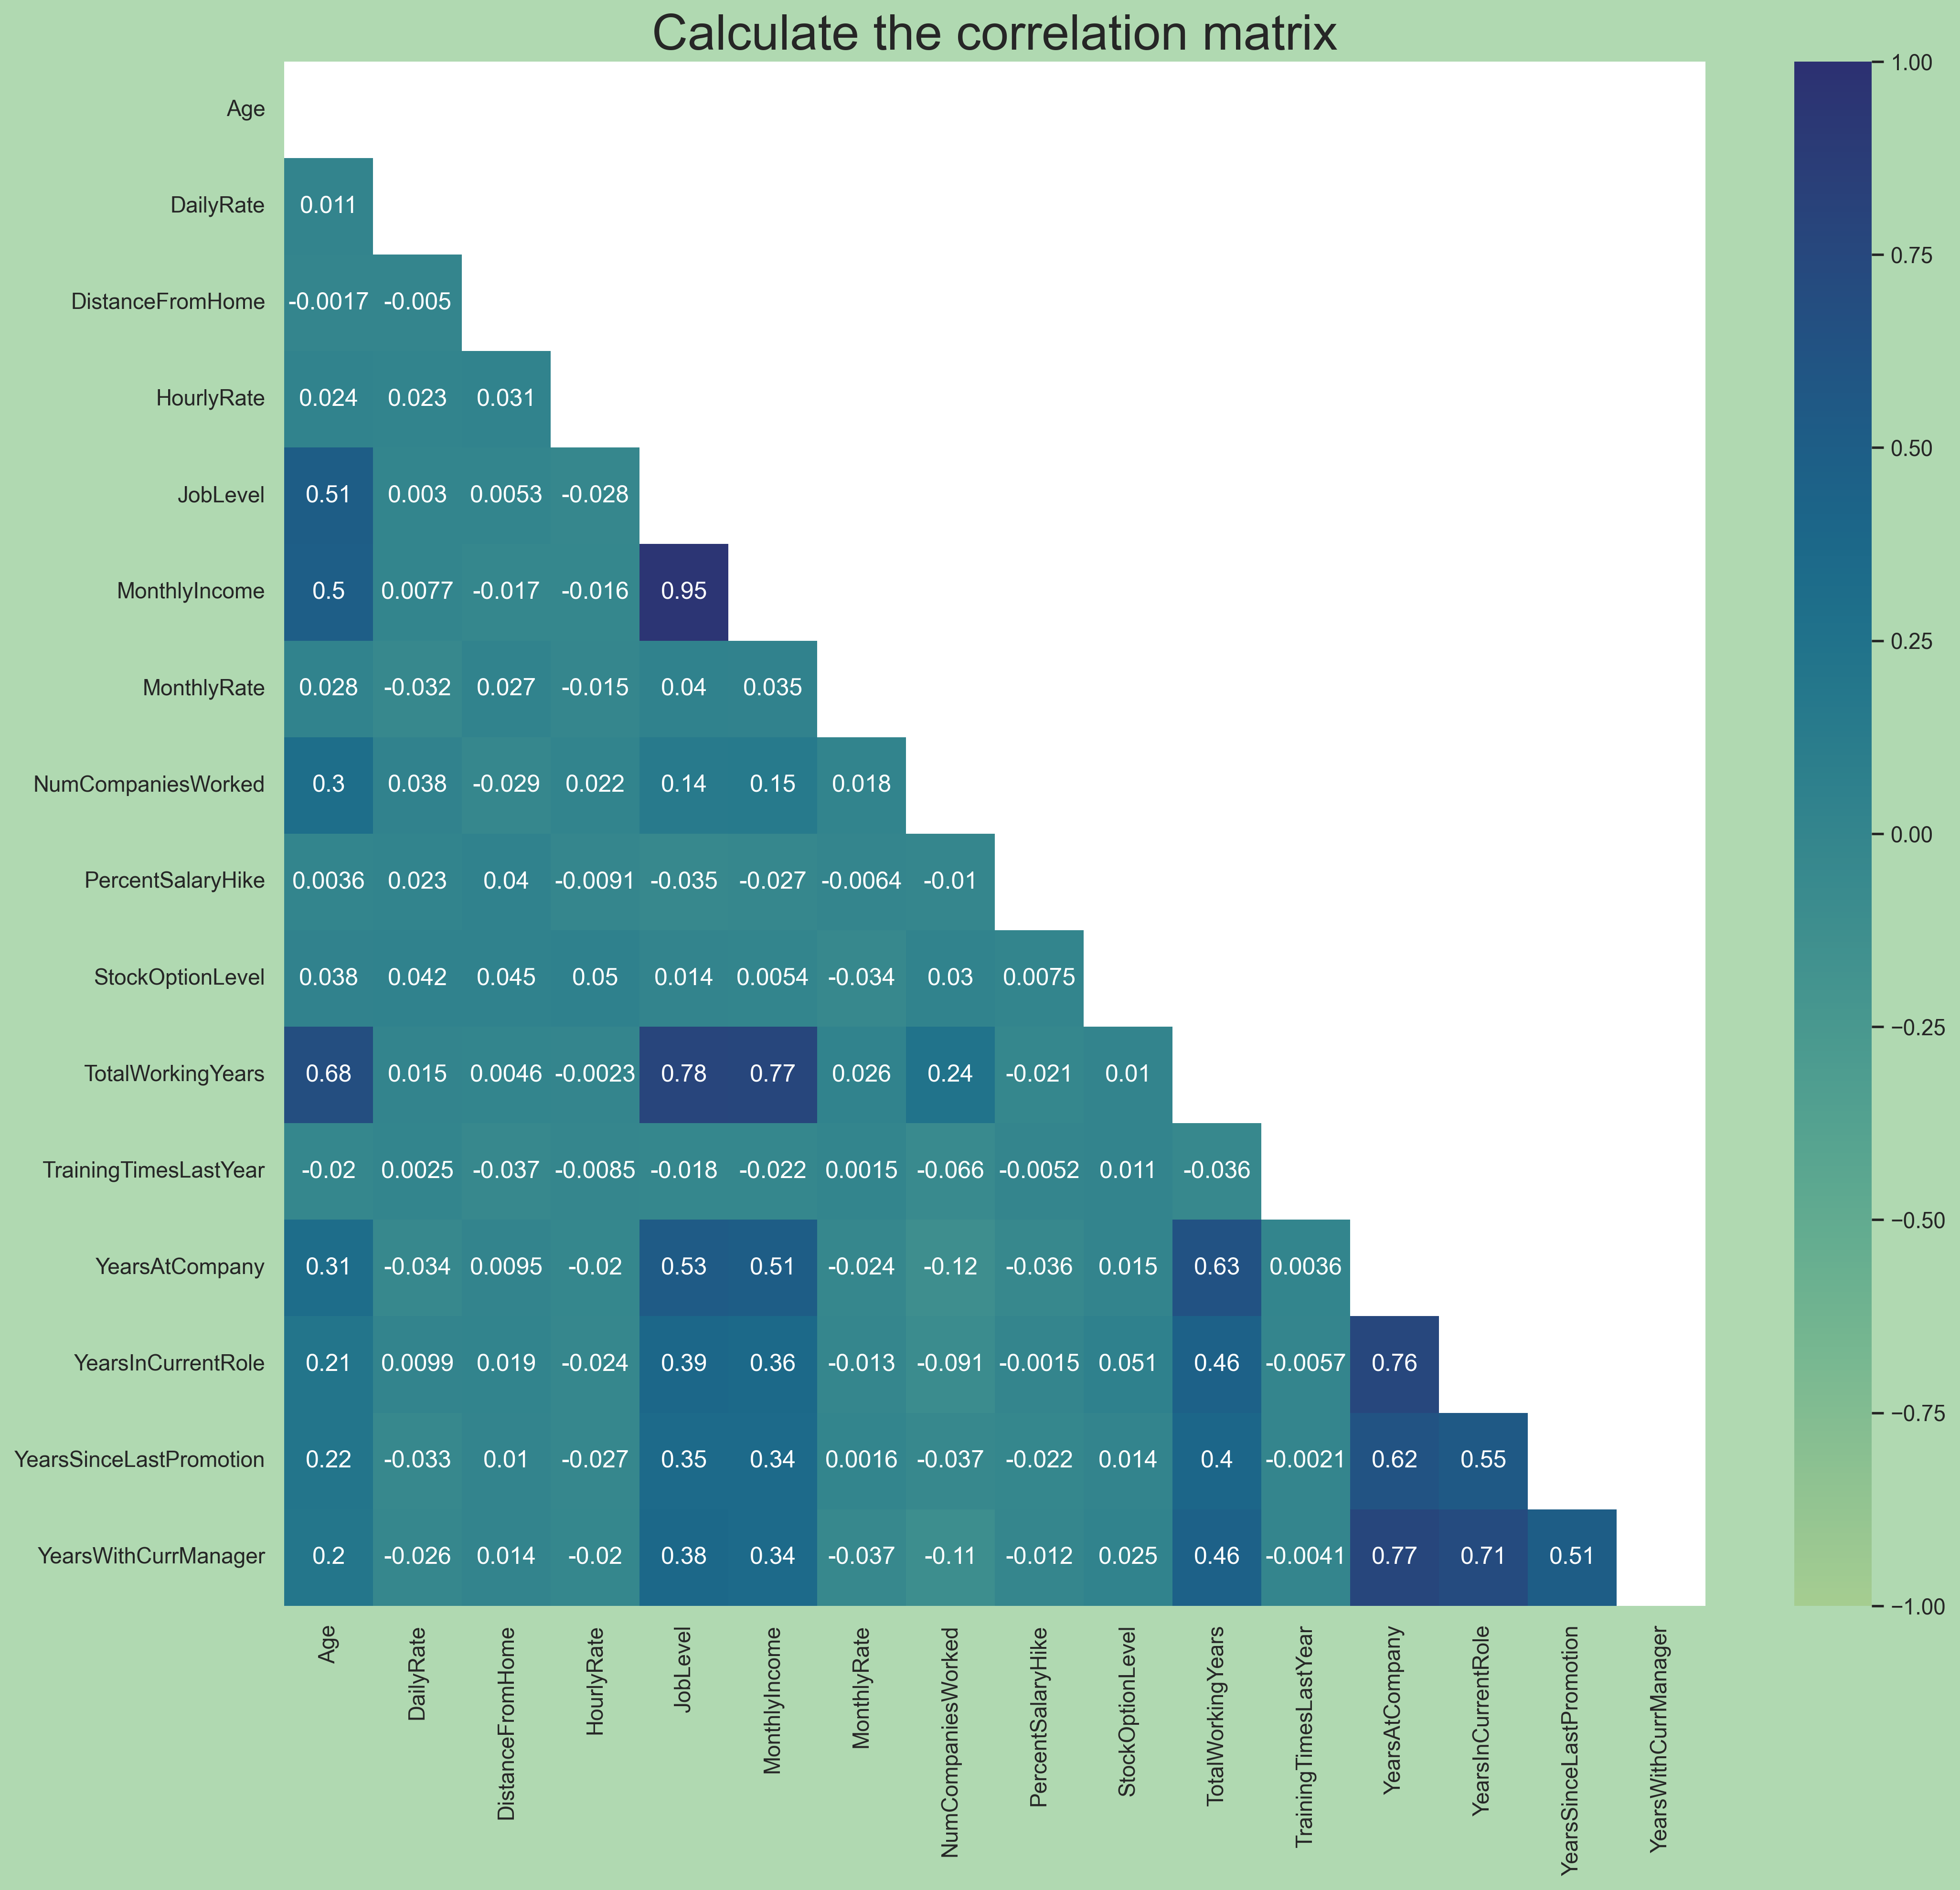

In [136]:
# Mask for showing a half heatmap
mask = np.triu(np.ones_like(DF.corr(numeric_only=True), dtype=bool))

plt.figure(figsize=(16,14),dpi=300)

sns.heatmap(
    DF.corr(numeric_only=True), 
    mask=mask, 
    annot=True, 
    cmap='crest', 
    center=0, 
    vmin=-1, 
    vmax=1)

plt.title('Calculate the correlation matrix', fontsize= 25)
plt.show()

### EDA Conclusion
- Employees from the Research Department have the highest count of Attrition.
- Employees with a Bachelor's Degree are the most likely to experience Attrition.
- It seems that employees are more likely to experience Attrition when their environmental satisfaction is lower.
- Mostly male employees experience Attrition, rather than female coworkers.
- When looking at marital status, those with a "single" status are most likely to experience Attrition.
- Work-life balance does not appear to be the primary issue, as suggested by the statistical results.
- MonthlyIncome & JobLevel have a highest correlation

### Preprocessing Dataset

In [137]:
# copy original datasets for the model
dataset = df.copy()

# selecting columns that not one of the Classification Definition
noclassic_columns = [g for g in dataset.columns if g not in classic_kolom]
del noclassic_columns[1]
noclassic_columns

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'EducationField',
 'Gender',
 'HourlyRate',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [138]:
# split Data
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

# Encoding the Label
encoding = LabelEncoder()
for encod in X[noclassic_columns]:
    X[encod] = encoding.fit_transform(X[encod])

# Scale the X Data
scale = MinMaxScaler()
X = scale.fit_transform(X)

### Training & Testing Data

In [139]:
# spliting into 2 training data & 2 testing data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, random_state=45)

# Oversampling to Address Imbalance in the Dataset
oversample = SMOTE(random_state=1)
xtrain_smote, ytrain_smote = oversample.fit_resample(x_train, y_train)

In [140]:
print(x_train.shape)
x_train

(1029, 30)


array([[1.        , 1.        , 0.75819209, ..., 0.11111111, 0.13333333,
        0.11764706],
       [0.19047619, 0.5       , 0.33898305, ..., 0.22222222, 0.        ,
        0.23529412],
       [0.35714286, 0.5       , 0.31977401, ..., 0.33333333, 0.53333333,
        0.47058824],
       ...,
       [0.73809524, 1.        , 0.76271186, ..., 0.44444444, 0.46666667,
        0.41176471],
       [0.14285714, 1.        , 0.96610169, ..., 0.16666667, 0.06666667,
        0.23529412],
       [0.78571429, 1.        , 0.93898305, ..., 0.11111111, 0.        ,
        0.17647059]])

In [141]:
print(xtrain_smote.shape)
xtrain_smote

(1742, 30)


array([[1.        , 1.        , 0.75819209, ..., 0.11111111, 0.13333333,
        0.11764706],
       [0.19047619, 0.5       , 0.33898305, ..., 0.22222222, 0.        ,
        0.23529412],
       [0.35714286, 0.5       , 0.31977401, ..., 0.33333333, 0.53333333,
        0.47058824],
       ...,
       [0.16362985, 1.        , 0.95630915, ..., 0.03383648, 0.02606288,
        0.02299666],
       [0.1769289 , 0.89778472, 0.19339992, ..., 0.02271451, 0.02725741,
        0.02405065],
       [0.15891014, 0.5       , 0.28768224, ..., 0.09269758, 0.05561855,
        0.09815038]])

### LogisticRegression Model
Logistic Regression is a model used to analyze the relationship between one or more independent variables and dependent data.

In [142]:
logistic = LogisticRegression(C=1000,max_iter=5000)
logistic.fit(xtrain_smote, ytrain_smote)

y_pred1 = logistic.predict(x_test)
print(f'LogisticRegression Accuracy : {accuracy_score(y_test,y_pred1)}')
print(f'\nKoefisien : {logistic.coef_[0]}')
print(f'\nIntercept : {logistic.intercept_}')

LogisticRegression Accuracy : 0.7120181405895691

Koefisien : [-0.83992833  0.52131212 -0.4851319   2.06442598  1.12331536  0.22702055
  0.76930584 -1.69030785  0.27620231  0.06908799 -1.32295085 -0.24969243
 -1.22539547 -1.12587078  1.87734202 -1.557589   -0.42875169  1.66143863
  1.45943698 -1.6483679   0.94949408 -0.68234522  0.42383273 -3.10203674
 -1.57820723 -0.8864182   1.63012068 -2.78584385  3.21050734 -0.5455054 ]

Intercept : [2.02370852]


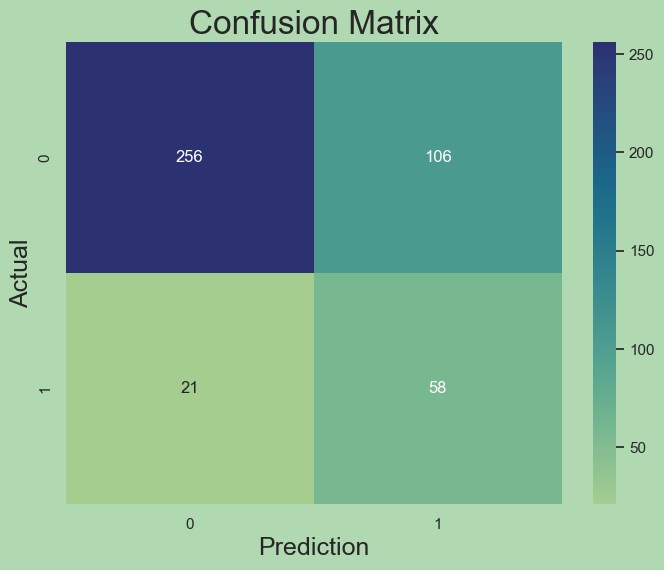

In [143]:
logmetric = confusion_matrix(y_test,y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(logmetric, annot=True, fmt='d', cmap='crest')
plt.xlabel('Prediction', fontsize= 18)
plt.ylabel('Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [144]:
print(f'{classification_report(y_test,y_pred1)}')

              precision    recall  f1-score   support

          No       0.92      0.71      0.80       362
         Yes       0.35      0.73      0.48        79

    accuracy                           0.71       441
   macro avg       0.64      0.72      0.64       441
weighted avg       0.82      0.71      0.74       441



### Naive Bayes Model
Naive Bayes is a model used to estimate the probability of a particular outcome for prediction.

In [145]:
nbmodel = GaussianNB()
nbmodel.fit(xtrain_smote,ytrain_smote)

y_pred2 = nbmodel.predict(x_test)
print(f'Naive Bayes Accuracy : {accuracy_score(y_test,y_pred2)}')

Naive Bayes Accuracy : 0.5850340136054422


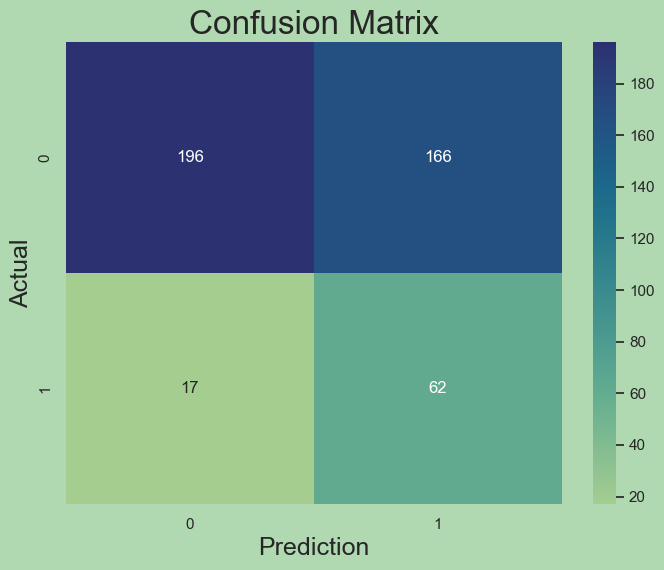

In [146]:
nbmetric = confusion_matrix(y_test,y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(nbmetric, annot=True, fmt='d', cmap='crest')
plt.xlabel('Prediction', fontsize= 18)
plt.ylabel('Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [147]:
print(f'{classification_report(y_test,y_pred2)}')

              precision    recall  f1-score   support

          No       0.92      0.54      0.68       362
         Yes       0.27      0.78      0.40        79

    accuracy                           0.59       441
   macro avg       0.60      0.66      0.54       441
weighted avg       0.80      0.59      0.63       441



### KNeighborsClassifier Model
K-Neighbors Classifier is a model used to identify patterns of similarity between independent and dependent data.

In [148]:
knmodel = KNeighborsClassifier(weights='uniform')
knmodel.fit(xtrain_smote,ytrain_smote)

y_pred3 = knmodel.predict(x_test)
print(f'KNeighborsClassifier Accuracy : {accuracy_score(y_test,y_pred3)}')

KNeighborsClassifier Accuracy : 0.6099773242630385


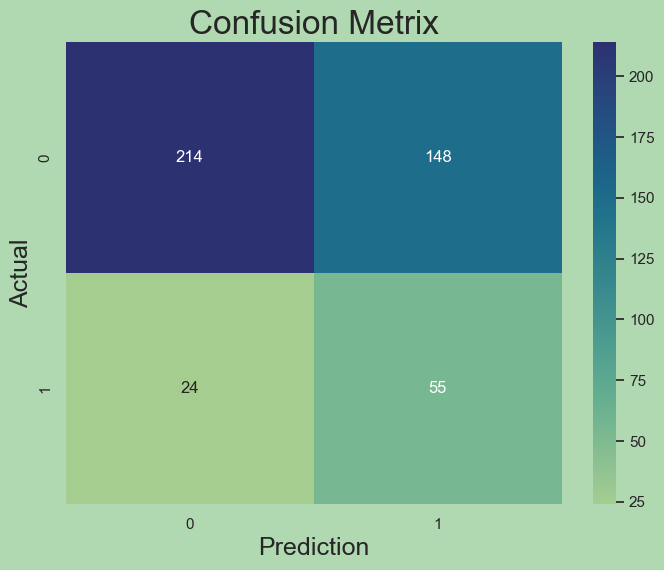

In [149]:
knmetric = confusion_matrix(y_test,y_pred3)

plt.figure(figsize=(8,6))
sns.heatmap(data=knmetric, annot=True, cmap='crest', fmt='d')
plt.xlabel('Prediction', fontsize= 18)
plt.ylabel('Actual', fontsize= 18)
plt.title('Confusion Metrix', fontsize= 24)
plt.show()

In [150]:
print('{}'.format(classification_report(y_test,y_pred3)))

              precision    recall  f1-score   support

          No       0.90      0.59      0.71       362
         Yes       0.27      0.70      0.39        79

    accuracy                           0.61       441
   macro avg       0.59      0.64      0.55       441
weighted avg       0.79      0.61      0.66       441



### RandomForestClassifier Model
RandomForestClassifier, similar to Decision Trees, helps identify important factors in datasets, but it uses multiple trees with their own starting points, as opposed to Decision Trees which have just one.

In [151]:
randomforest = RandomForestClassifier()
randomforest.fit(xtrain_smote,ytrain_smote)

y_pred4 = randomforest.predict(x_test)
print(f'RandomForestClassifier Accuracy : {accuracy_score(y_test,y_pred4)}')

RandomForestClassifier Accuracy : 0.854875283446712


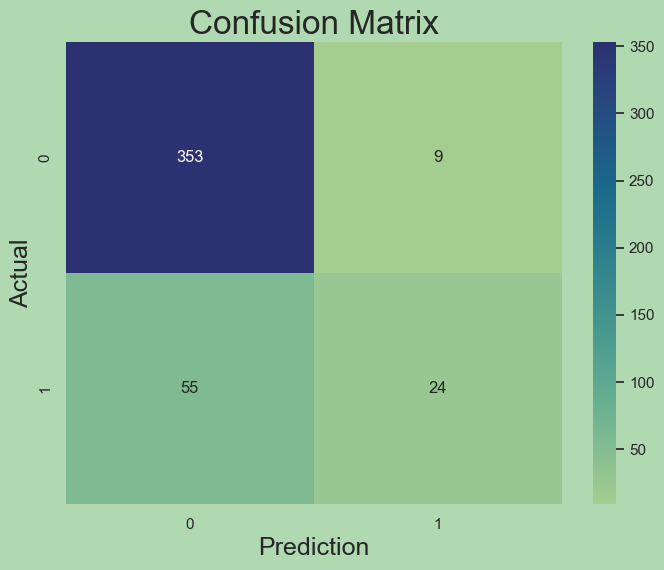

In [152]:
randomforestmetric = confusion_matrix(y_test,y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(randomforestmetric, annot=True, fmt='d', cmap='crest')
plt.xlabel('Prediction', fontsize= 18)
plt.ylabel('Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [153]:
print(f'{classification_report(y_test,y_pred4)}')

              precision    recall  f1-score   support

          No       0.87      0.98      0.92       362
         Yes       0.73      0.30      0.43        79

    accuracy                           0.85       441
   macro avg       0.80      0.64      0.67       441
weighted avg       0.84      0.85      0.83       441



### GradientBoostingClassifier Model
GradientBoostingClassifier combines weak models to create a stronger and more accurate model.

In [154]:
gbmodel = GradientBoostingClassifier()
gbmodel.fit(xtrain_smote,ytrain_smote)

y_pred5 = gbmodel.predict(x_test)
print('GradientBoostingClassifier Accuracy: {}'.format(accuracy_score(y_test,y_pred5)))

GradientBoostingClassifier Accuracy: 0.8707482993197279


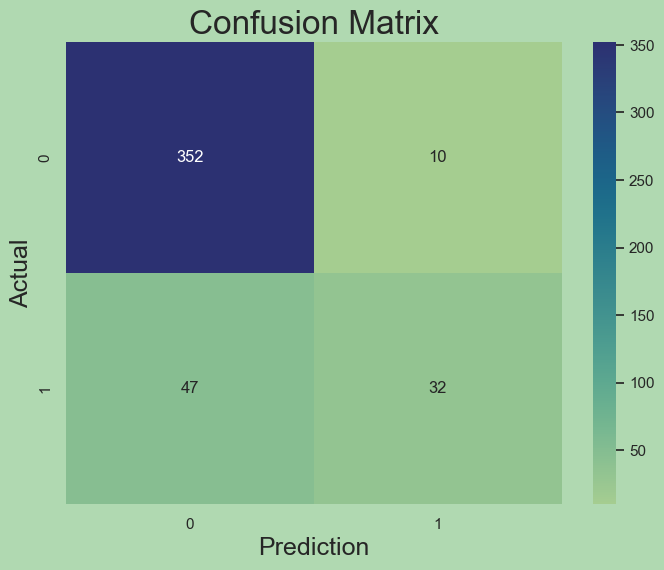

In [155]:
gbmetric = confusion_matrix(y_test,y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(data=gbmetric, annot=True, fmt='d', cmap='crest')
plt.xlabel('Prediction', fontsize= 18)
plt.ylabel('Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [156]:
print('{}'.format(classification_report(y_test,y_pred5)))

              precision    recall  f1-score   support

          No       0.88      0.97      0.93       362
         Yes       0.76      0.41      0.53        79

    accuracy                           0.87       441
   macro avg       0.82      0.69      0.73       441
weighted avg       0.86      0.87      0.85       441

